In [1]:
from fit2d import RingModel
from fit2d._helpers import calc_physical_distance_per_pixel
from fit2d._velocity_field_generator import create_2d_velocity_field

from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np


ring = create_2d_velocity_field(
    radii = np.linspace(0,100,100),
    
    v_rot = 10,  # just fill in any velocity
        i=45. * np.pi/180,
        pa=45 * np.pi/180,
        x_dim=200, 
        y_dim=200, 
        x_center=100, 
        y_center=100, 
        kpc_per_pixel=5.,
        r_min_kpc=10.,
        r_max_kpc=70,
)



/home/annakwa/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/annakwa/little-things/fit2d/fit2d/_velocity_field_generator.py:39: RuntimeWarning: invalid value encountered in true_divide
  cos_theta = ( (y - y_center) * np.cos(pa) - (x - x_center) * np.sin(pa) ) / r_cen


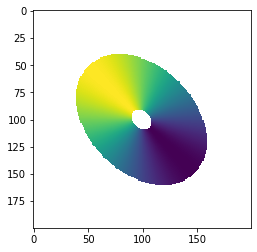

In [2]:
import matplotlib.pyplot as plt
plt.imshow(ring)

#### Change values in the cell below to be correct for the galaxy you are looking at

In [7]:
ring_param_file = "/home/anna/Desktop/fit2d/data/UGC3974_ring_parameters.txt"
dispersion_fits_file = "/home/anna/Desktop/fit2d/data/UGC3974_2mom.fits"


distance = 8000. # [kpc]
deg_per_pixel=4.17e-4


In [8]:
xdim, ydim = fits.open(dispersion_fits_file)[0].data.shape
kpc_per_pixel = calc_physical_distance_per_pixel(distance, deg_per_pixel)


ring_model = RingModel(
    ring_param_file=ring_param_file,
    fits_xdim=xdim,
    fits_ydim=ydim,
    distance=distance
)

#### Set the values of `rmin` and `rmax` in the function below to the edges of the ring you want to cut out. Don't change the other function arguments.

In [14]:
mask = ring_mask(
    rmin=3.6,   # change this to the inside edge of the ring, in kpc
    rmax=5.5,   # change this to the outside edge of the ring, in kpc
    ring_model=ring_model,
    kpc_per_pixel=kpc_per_pixel,
    xdim=xdim,
    ydim=ydim)


#### This is the ring mask you just made. It has value of 1.0 where you want to cut the ring out, and NaN everywhere else.

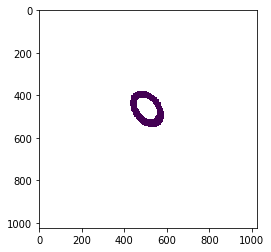

In [17]:
plt.imshow(mask)

####  You can now cut a ring out of the dispersion map by multiplying it with the mask from the above step. Multiplying by 1.0 keeps the dispersion values in the ring, and multiplying by NaN makes values outside the ring NaN.


In [18]:
dispersion_map = fits.open(dispersion_fits_file)[0].data
dispersion_ring = mask * dispersion_map

#### This is the ring that you cut out of the dispersion map

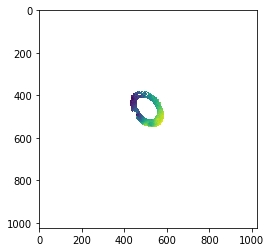

In [19]:
plt.imshow(dispersion_ring)

#### Now you can calculate the root mean square (RMS) of the dispersion within radii `(rmin, rmax)`. Remember we want $ \sqrt{ mean{(\sigma_{v}^{2})}}$ where $\sigma_{v}$ here is the dispersion. This is different than just taking the average of all the dispersion values in the ring.

#### Fill in the function below to take in the dispersion ring (which is a numpy array) from above and do the RMS calculation. This will give us the uncertainty due to dispersion at radius `r`, where `r` is the midpoint of the ring you defined by `(rmin, rmax)`

In [21]:
# fill in the function below to take in the dispersion ring (which is a numpy array) from above
# and do the RMS calculation. This will

def rms_dispersion(dispersion_ring: np.ndarray):
    # write code below to calculate rms = root mean square as described above
    ...
    ...
    return rms